# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import stats
import scipy.stats as stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response  = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather  = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

#  If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | harsin
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | abashiri
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | nouadhibou
Processing Record 11 of Set 1 | bhopal
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | ilebo
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | kudahuvadhoo
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | praia da vitoria
Processing Record 22 of Set 1 | san pedro pochutla
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
#city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,harsin,34.2721,47.5861,-0.55,92,74,1.29,IR,1707273494
1,st. john's,47.5649,-52.7093,0.08,92,100,12.96,CA,1707273494
2,ilulissat,69.2167,-51.1000,-6.99,49,100,11.32,GL,1707273494
3,luderitz,-26.6481,15.1594,18.64,79,70,5.44,NA,1707273495
4,college,64.8569,-147.8028,-15.31,79,75,2.06,US,1707273495
...,...,...,...,...,...,...,...,...,...
545,gorontalo,0.5412,123.0595,32.78,52,69,1.38,ID,1707273695
546,mil'kovo,55.6078,37.7956,-7.78,100,97,0.85,RU,1707273696
547,perevoz,55.5961,44.5446,-22.23,99,56,2.73,RU,1707273696
548,basi,26.8333,76.0333,14.19,36,95,1.90,IN,1707273457


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,harsin,34.2721,47.5861,-0.55,92,74,1.29,IR,1707273494
1,st. john's,47.5649,-52.7093,0.08,92,100,12.96,CA,1707273494
2,ilulissat,69.2167,-51.1000,-6.99,49,100,11.32,GL,1707273494
3,luderitz,-26.6481,15.1594,18.64,79,70,5.44,NA,1707273495
4,college,64.8569,-147.8028,-15.31,79,75,2.06,US,1707273495


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harsin,34.2721,47.5861,-0.55,92,74,1.29,IR,1707273494
1,st. john's,47.5649,-52.7093,0.08,92,100,12.96,CA,1707273494
2,ilulissat,69.2167,-51.1000,-6.99,49,100,11.32,GL,1707273494
3,luderitz,-26.6481,15.1594,18.64,79,70,5.44,NaN,1707273495
4,college,64.8569,-147.8028,-15.31,79,75,2.06,US,1707273495


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

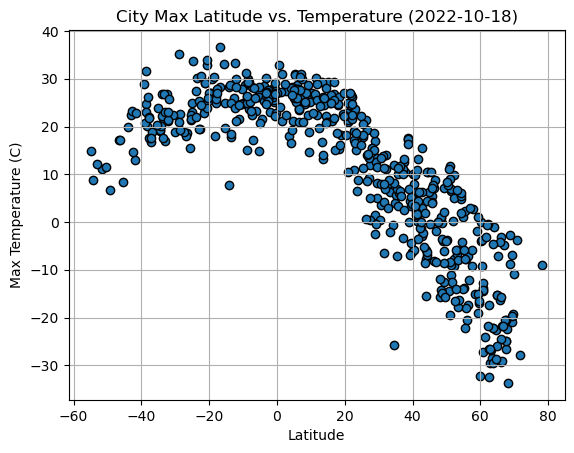

In [9]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

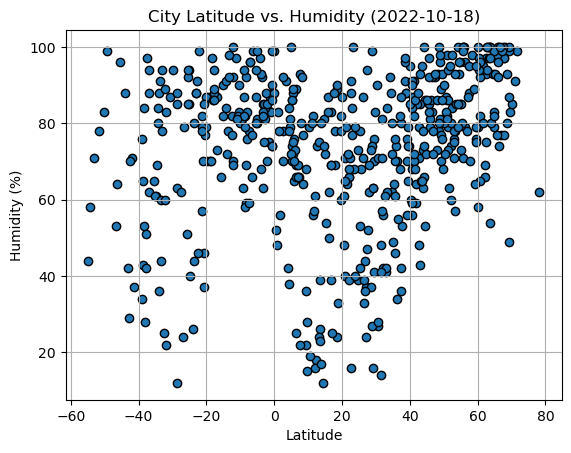

In [10]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

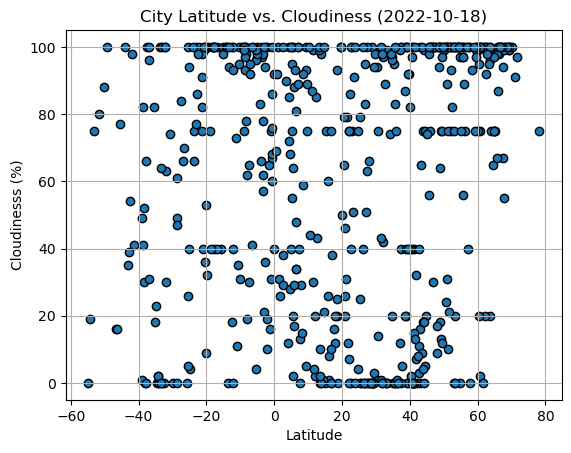

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudinesss (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

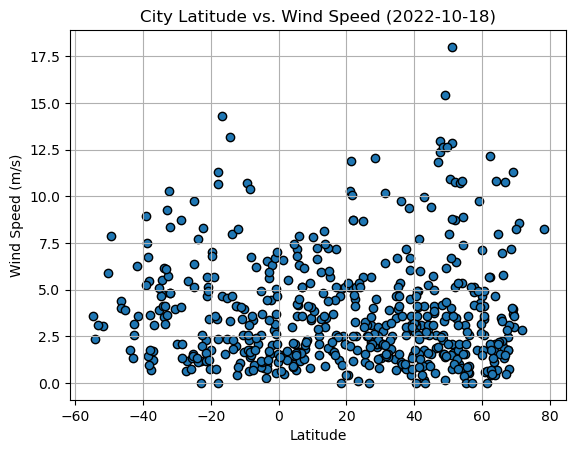

In [12]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def Plot_Linear_Regression(x_values, y_values):
   (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   plt.plot(x_values, regress_values, color = "red")
   
   return[line_eq, rvalue]

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harsin,34.2721,47.5861,-0.55,92,74,1.29,IR,1707273494
1,st. john's,47.5649,-52.7093,0.08,92,100,12.96,CA,1707273494
2,ilulissat,69.2167,-51.1000,-6.99,49,100,11.32,GL,1707273494
4,college,64.8569,-147.8028,-15.31,79,75,2.06,US,1707273495
5,abashiri,44.0213,144.2697,-7.84,73,75,1.03,JP,1707273495


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,luderitz,-26.6481,15.1594,18.64,79,70,5.44,NaN,1707273495
6,papatowai,-46.5619,169.4708,17.11,53,16,4.37,NZ,1707273496
8,bredasdorp,-34.5322,20.0403,19.03,69,0,4.79,ZA,1707273496
12,ilebo,-4.3167,20.5833,21.52,97,83,0.82,CD,1707273498
13,margaret river,-33.9500,115.0667,26.88,36,0,3.51,AU,1707273498


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8836232311955419


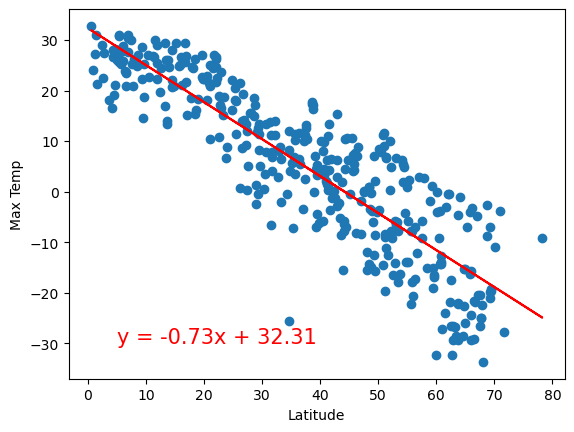

In [24]:
# Linear regression on Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(5,-30),fontsize=15,color="red")

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig05.png")

# Show plot
plt.show()

The r-value is: 0.5173259248951545


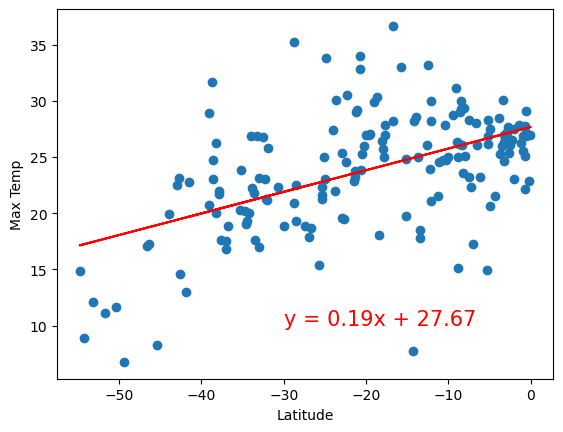

In [25]:
# Linear regression on Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-30,10),fontsize=15,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig06.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45770829304904675


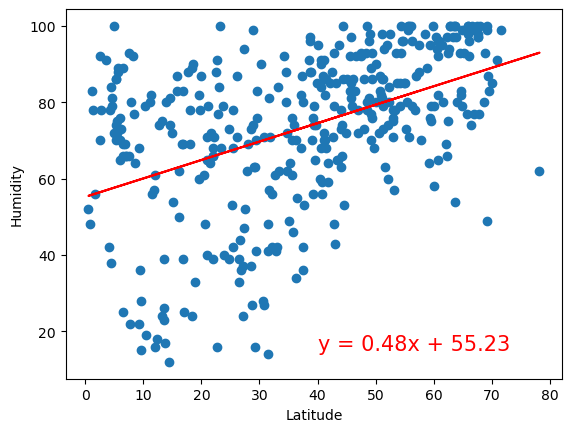

In [18]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(40,15),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig07.png")

# Show plot
plt.show()

The r-value is: 0.3848055275998203


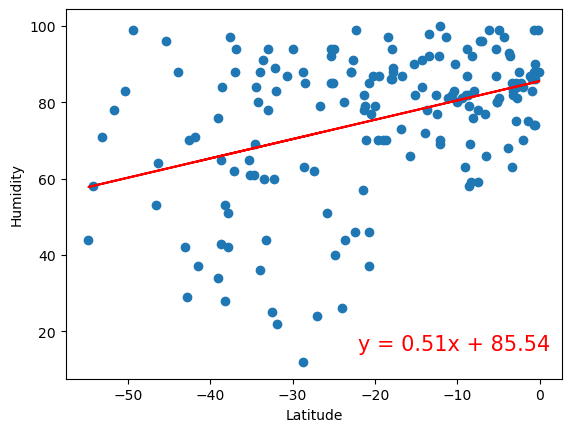

In [26]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-22,15),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig08.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30432207857779536


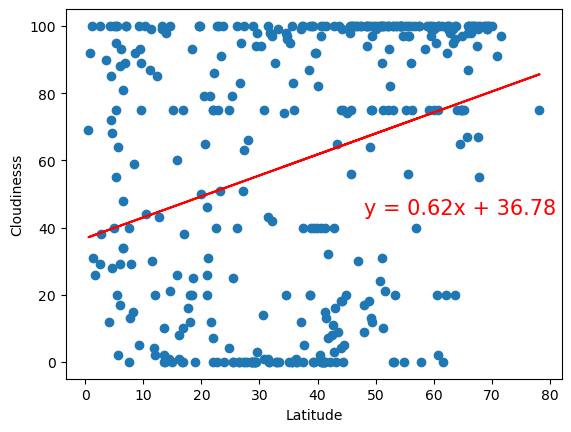

In [20]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(48,44),fontsize=15,color="red")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig09.png")

# Show plot
plt.show()

The r-value is: 0.2719696816468355


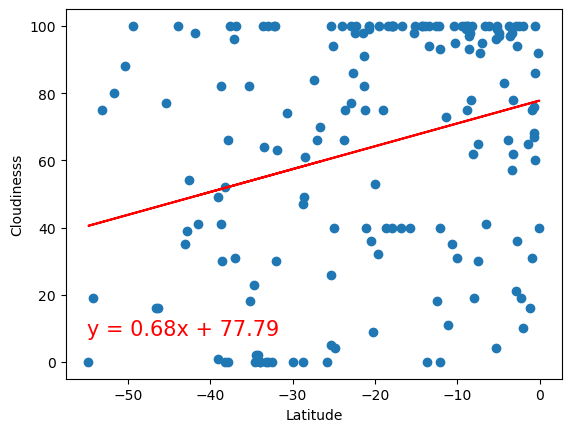

In [29]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,8),fontsize=15,color="red")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06590228054617041


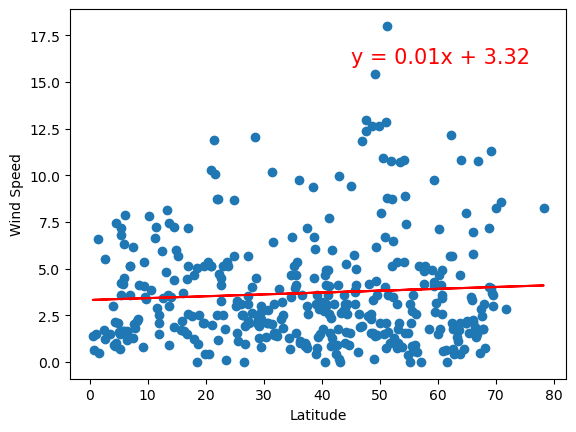

In [22]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(45,16),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: -0.13161584125686107


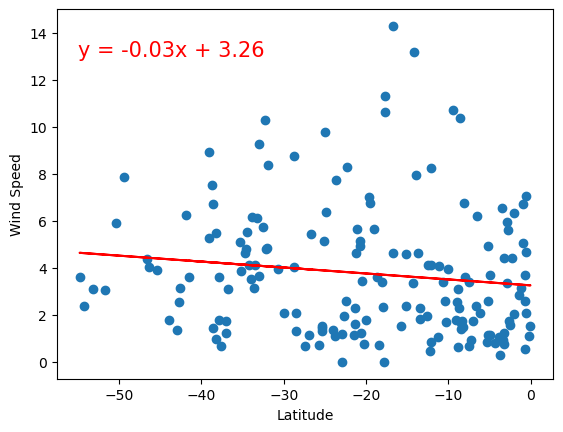

In [30]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,13),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE